# ***`MNIST Fashion Model`***

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

### **We are going to use a dataset included in Keras. This dataset has 60,000 images for training and 10,000 images for validation/testing.**

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
train_images[0, 23, 23]

194

In [5]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

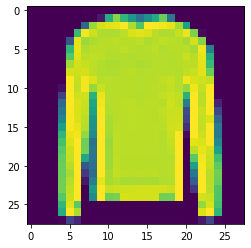

In [7]:
plt.figure()
plt.imshow(train_images[15000])
plt.show();

In [8]:
# preproccessing the data
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
train_images.shape
train_labels.shape

(60000,)

In [10]:
# Building the Model
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),     # input layer  (1)
                          keras.layers.Dense(128, activation="relu"),     # hidden layer (2)
                          keras.layers.Dense(10, activation="softmax")    # output layer (3)
                          ])

In [11]:
# Compiling the model
model.compile(optimizer="adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [12]:
# Training the model
model.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4981 - accuracy: 0.8231
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3743 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3358 - accuracy: 0.8781
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3112 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2920 - accuracy: 0.8931
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2799 - accuracy: 0.8966
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2674 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2452 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.239

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print(test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8841
0.8841000199317932


In [14]:
# Making Predictions
predictions = model.predict(test_images)

Predicted Index No: 4
Predicted Object: Coat
Actual Image


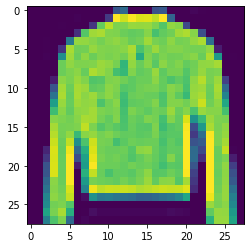

In [15]:
def preds(i):
  print("Predicted Index No:", np.argmax(predictions[i]))
  print("Predicted Object:", class_names[np.argmax(predictions[i])])
  print("Actual Image")
  plt.figure()
  plt.imshow(test_images[i])
  plt.show();

preds(997)

Pick a Number:500


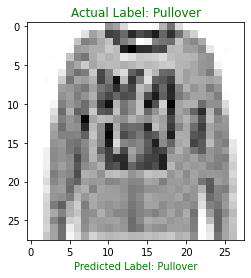

In [35]:
# Verifying Predictions in an interesting way

def predict(model, image, correct_label):
  class_names = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]
  
  if class_names[correct_label] == predicted_class:
    COLOR = "green"
  else:
    COLOR = "red"
  plt.rcParams['text.color'] = COLOR
  plt.rcParams["axes.labelcolor"] = COLOR
  
  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap= plt.cm.binary)
  plt.title("Actual Label: " + label)
  plt.xlabel("Predicted Label: " + guess)
  plt.show()


def get_number():
  while True:
    num = input("Pick a Number:")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 9999:
        return num
      else:
        print("Enter between 0 and 9999")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)